In [1]:
import pandas as pd
import numpy as np
from ftplib import FTP
import os

from datetime import datetime

# Data Viz. 
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter
from calendar import monthrange
from calendar import month_name

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'
cmaps_hex = ['#193251','#FF5A36','#1E4485', '#99D04A','#FF5A36', '#DB6668']
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

plt.rcParams.update({'figure.facecolor':'white'})

In [2]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf

from pmdarima.arima import auto_arima
import statsmodels.graphics.tsaplots as tsaplot
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing, SimpleExpSmoothing

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_m = pd.read_csv('data/masie_4km_allyears_extent_sqkm.csv')
df_m.head()

yyyyddd  Northern_Hemisphere  Beaufort_Sea  Chukchi_Sea  East_Siberian_Sea  \
0  2006001          13034723.95    1069710.81    966006.16         1087102.72   
1  2006002          13034723.95    1069710.81    966006.16         1087102.72   
2  2006003          13170663.24    1069710.81    966006.16         1087102.72   
3  2006004          13409715.53    1069710.81    966006.16         1087102.72   
4  2006005          13416779.12    1069710.81    966006.16         1087102.72   

   Laptev_Sea   Kara_Sea  Barents_Sea  Greenland_Sea  \
0   897773.37  901663.34    432629.77      550158.41   
1   897773.37  901663.34    432629.77      550158.41   
2   897773.37  901663.34    432629.77      595342.42   
3   897773.37  906439.04    458823.88      605747.86   
4   897773.37  908697.29    474574.82      600826.71   

   Baffin_Bay_Gulf_of_St._Lawrence  Canadian_Archipelago  Hudson_Bay  \
0                        831365.98             852715.31  1260715.19   
1                        831365.98             852715.31  1260715.19   
2                        855907.47             852715.31  1260779.00   
3                        980253.85             852715.31  1260779.00   
4                        970631.09             852715.31  1260779.00   

   Central_Arctic  Bering_Sea  Baltic_Sea  Sea_of_Okhotsk  Yellow_Sea  \
0      3225371.74   639590.07    11408.53       287369.54    12152.54   
1      3225371.74   639590.07    11408.53       287369.54    12152.54   
2      3240507.71   666030.40    11408.53       311943.21    12152.54   
3      3240326.47   683780.08    11408.53       372868.02     6989.96   
4      3240326.47   683795.38    21311.46       363515.34     8240.73   

   Cook_Inlet  
0     6420.96  
1     6420.96  
2     6420.96  
3     6420.96  
4     8202.95

In [4]:
df_m.columns

Index(['yyyyddd', 'Northern_Hemisphere', 'Beaufort_Sea', 'Chukchi_Sea',
       'East_Siberian_Sea', 'Laptev_Sea', 'Kara_Sea', 'Barents_Sea',
       'Greenland_Sea', 'Baffin_Bay_Gulf_of_St._Lawrence',
       'Canadian_Archipelago', 'Hudson_Bay', 'Central_Arctic', 'Bering_Sea',
       'Baltic_Sea', 'Sea_of_Okhotsk', 'Yellow_Sea', 'Cook_Inlet'],
      dtype='object')

In [5]:
df_m.head()

yyyyddd  Northern_Hemisphere  Beaufort_Sea  Chukchi_Sea  East_Siberian_Sea  \
0  2006001          13034723.95    1069710.81    966006.16         1087102.72   
1  2006002          13034723.95    1069710.81    966006.16         1087102.72   
2  2006003          13170663.24    1069710.81    966006.16         1087102.72   
3  2006004          13409715.53    1069710.81    966006.16         1087102.72   
4  2006005          13416779.12    1069710.81    966006.16         1087102.72   

   Laptev_Sea   Kara_Sea  Barents_Sea  Greenland_Sea  \
0   897773.37  901663.34    432629.77      550158.41   
1   897773.37  901663.34    432629.77      550158.41   
2   897773.37  901663.34    432629.77      595342.42   
3   897773.37  906439.04    458823.88      605747.86   
4   897773.37  908697.29    474574.82      600826.71   

   Baffin_Bay_Gulf_of_St._Lawrence  Canadian_Archipelago  Hudson_Bay  \
0                        831365.98             852715.31  1260715.19   
1                        831365.98             852715.31  1260715.19   
2                        855907.47             852715.31  1260779.00   
3                        980253.85             852715.31  1260779.00   
4                        970631.09             852715.31  1260779.00   

   Central_Arctic  Bering_Sea  Baltic_Sea  Sea_of_Okhotsk  Yellow_Sea  \
0      3225371.74   639590.07    11408.53       287369.54    12152.54   
1      3225371.74   639590.07    11408.53       287369.54    12152.54   
2      3240507.71   666030.40    11408.53       311943.21    12152.54   
3      3240326.47   683780.08    11408.53       372868.02     6989.96   
4      3240326.47   683795.38    21311.46       363515.34     8240.73   

   Cook_Inlet  
0     6420.96  
1     6420.96  
2     6420.96  
3     6420.96  
4     8202.95

In [6]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   yyyyddd                          5865 non-null   int64  
 1   Northern_Hemisphere              5865 non-null   float64
 2   Beaufort_Sea                     5865 non-null   float64
 3   Chukchi_Sea                      5865 non-null   float64
 4   East_Siberian_Sea                5865 non-null   float64
 5   Laptev_Sea                       5865 non-null   float64
 6   Kara_Sea                         5865 non-null   float64
 7   Barents_Sea                      5865 non-null   float64
 8   Greenland_Sea                    5865 non-null   float64
 9   Baffin_Bay_Gulf_of_St._Lawrence  5865 non-null   float64
 10  Canadian_Archipelago             5865 non-null   float64
 11  Hudson_Bay                       5865 non-null   float64
 12  Central_Arctic      

In [7]:
df_m.nunique()

yyyyddd                            5865
Northern_Hemisphere                5812
Beaufort_Sea                       2857
Chukchi_Sea                        3470
East_Siberian_Sea                  2827
Laptev_Sea                         2540
Kara_Sea                           4473
Barents_Sea                        4700
Greenland_Sea                      5452
Baffin_Bay_Gulf_of_St._Lawrence    5483
Canadian_Archipelago               2829
Hudson_Bay                         3429
Central_Arctic                     4865
Bering_Sea                         3683
Baltic_Sea                         1805
Sea_of_Okhotsk                     3525
Yellow_Sea                          831
Cook_Inlet                          887
dtype: int64

In [8]:
df_m.describe().T

count          mean           std  \
yyyyddd                          5865.0  2.013799e+06  4.669655e+03   
Northern_Hemisphere              5865.0  1.068608e+07  3.529154e+06   
Beaufort_Sea                     5865.0  9.360221e+05  2.011215e+05   
Chukchi_Sea                      5865.0  7.238690e+05  2.844076e+05   
East_Siberian_Sea                5865.0  9.124121e+05  2.946474e+05   
Laptev_Sea                       5865.0  7.018388e+05  2.957991e+05   
Kara_Sea                         5865.0  6.197468e+05  3.540002e+05   
Barents_Sea                      5865.0  3.043216e+05  2.593336e+05   
Greenland_Sea                    5865.0  4.852749e+05  1.690657e+05   
Baffin_Bay_Gulf_of_St._Lawrence  5865.0  7.508586e+05  5.465884e+05   
Canadian_Archipelago             5865.0  7.281730e+05  1.936481e+05   
Hudson_Bay                       5865.0  7.466001e+05  5.335895e+05   
Central_Arctic                   5865.0  3.163874e+06  1.127491e+05   
Bering_Sea                       5865.0  2.698117e+05  3.162032e+05   
Baltic_Sea                       5865.0  2.390430e+04  4.394710e+04   
Sea_of_Okhotsk                   5865.0  3.066591e+05  3.861038e+05   
Yellow_Sea                       5865.0  3.868792e+03  9.979315e+03   
Cook_Inlet                       5865.0  3.161438e+03  4.749960e+03   

                                        min         25%          50%  \
yyyyddd                          2006001.00  2010036.00   2014046.00   
Northern_Hemisphere              3368882.08  7574751.57  11409805.06   
Beaufort_Sea                      173466.99   831750.44   1064644.33   
Chukchi_Sea                           51.08   518389.46    863563.60   
East_Siberian_Sea                     35.05   868784.34   1082547.21   
Laptev_Sea                             0.00   551099.71    895838.03   
Kara_Sea                               0.00   238604.33    821344.65   
Barents_Sea                            0.00    42545.68    267316.10   
Greenland_Sea                      28610.82   360444.21    537251.62   
Baffin_Bay_Gulf_of_St._Lawrence     1857.66   176666.69    772758.72   
Canadian_Archipelago              129273.33   669910.58    847637.53   
Hudson_Bay                             0.00    98714.02   1017909.13   
Central_Arctic                   2483818.83  3149526.67   3203038.05   
Bering_Sea                             0.00       33.41     98386.49   
Baltic_Sea                             0.00        0.00        48.09   
Sea_of_Okhotsk                         0.00       42.51     70924.40   
Yellow_Sea                             0.00        0.00         0.00   
Cook_Inlet                             0.00        0.00       109.63   

                                         75%          max  
yyyyddd                           2018059.00   2022064.00  
Northern_Hemisphere              13913402.38  15821891.32  
Beaufort_Sea                      1070444.98   1070775.89  
Chukchi_Sea                        966006.16    966006.16  
East_Siberian_Sea                 1087137.23   1087137.23  
Laptev_Sea                         897844.80    897844.80  
Kara_Sea                           921196.75    935023.26  
Barents_Sea                        528901.47    936263.42  
Greenland_Sea                      615539.32    866528.47  
Baffin_Bay_Gulf_of_St._Lawrence   1196864.42   1997627.73  
Canadian_Archipelago               853214.25    854685.30  
Hudson_Bay                        1260308.98   1260903.34  
Central_Arctic                    3232190.81   3248012.93  
Bering_Sea                         541568.36   1249262.81  
Baltic_Sea                          28485.14    311699.53  
Sea_of_Okhotsk                     589685.10   1310868.59  
Yellow_Sea                             24.93     66146.42  
Cook_Inlet                           5555.45     22141.70

In [9]:
df_m.isnull().sum()

yyyyddd                            0
Northern_Hemisphere                0
Beaufort_Sea                       0
Chukchi_Sea                        0
East_Siberian_Sea                  0
Laptev_Sea                         0
Kara_Sea                           0
Barents_Sea                        0
Greenland_Sea                      0
Baffin_Bay_Gulf_of_St._Lawrence    0
Canadian_Archipelago               0
Hudson_Bay                         0
Central_Arctic                     0
Bering_Sea                         0
Baltic_Sea                         0
Sea_of_Okhotsk                     0
Yellow_Sea                         0
Cook_Inlet                         0
dtype: int64

### Converting yyyyddd to date column and adding day, month and year columns

In [10]:
date =[]
for i in range(0, len(df_m['yyyyddd'])):
   day_year=str(df_m['yyyyddd'][i])
   day_num = day_year[-3:]
   year_num = day_year[:4]
   #print(year_num)
   #print("The day number : " + str(day_num))
   # adjusting day num
   day_num.rjust(3 + len(day_num), '0')
   # converting to date
   res = datetime.strptime(year_num + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
   date.append(res)

In [11]:
from datetime import datetime
date =[]
date_day =[]
date_month=[]
date_year=[]
for i in range(0, len(df_m['yyyyddd'])):
   day_year=str(df_m['yyyyddd'][i])
   day_num = day_year[-3:]
   year_num = day_year[:4]
   #print(year_num)
   #print("The day number : " + str(day_num))
   # adjusting day num
   day_num.rjust(3 + len(day_num), '0')
   # converting to date
   res = datetime.strptime(year_num + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
   date.append(res)
   str_day=str(res)
   #print(res)
   date_day.append(res[3:5])
   date_year.append(res[6:])
   date_month.append(res[0:2])
df_m = df_m.assign(
    date = date,
    day = date_day,
    month = date_month,
    year = date_year
    )
df_m.head(2)

yyyyddd  Northern_Hemisphere  Beaufort_Sea  Chukchi_Sea  East_Siberian_Sea  \
0  2006001          13034723.95    1069710.81    966006.16         1087102.72   
1  2006002          13034723.95    1069710.81    966006.16         1087102.72   

   Laptev_Sea   Kara_Sea  Barents_Sea  Greenland_Sea  \
0   897773.37  901663.34    432629.77      550158.41   
1   897773.37  901663.34    432629.77      550158.41   

   Baffin_Bay_Gulf_of_St._Lawrence  ...  Central_Arctic  Bering_Sea  \
0                        831365.98  ...      3225371.74   639590.07   
1                        831365.98  ...      3225371.74   639590.07   

   Baltic_Sea  Sea_of_Okhotsk  Yellow_Sea  Cook_Inlet        date  day month  \
0    11408.53       287369.54    12152.54     6420.96  01-01-2006   01    01   
1    11408.53       287369.54    12152.54     6420.96  01-02-2006   02    01   

   year  
0  2006  
1  2006  

[2 rows x 22 columns]

#### Dropping yyyyddd column and converting date column to datetime format

In [12]:
df_m.drop('yyyyddd', axis = 1, inplace = True)

In [13]:
#df_m['day'] = pd.to_datetime(df_m['date'])

In [14]:
#df_masie['datetime'] = pd.to_datetime(df_masie.date, format='%m-%d-%Y')

In [15]:
df_m.head(2)

Northern_Hemisphere  Beaufort_Sea  Chukchi_Sea  East_Siberian_Sea  \
0          13034723.95    1069710.81    966006.16         1087102.72   
1          13034723.95    1069710.81    966006.16         1087102.72   

   Laptev_Sea   Kara_Sea  Barents_Sea  Greenland_Sea  \
0   897773.37  901663.34    432629.77      550158.41   
1   897773.37  901663.34    432629.77      550158.41   

   Baffin_Bay_Gulf_of_St._Lawrence  Canadian_Archipelago  ...  Central_Arctic  \
0                        831365.98             852715.31  ...      3225371.74   
1                        831365.98             852715.31  ...      3225371.74   

   Bering_Sea  Baltic_Sea  Sea_of_Okhotsk  Yellow_Sea  Cook_Inlet        date  \
0   639590.07    11408.53       287369.54    12152.54     6420.96  01-01-2006   
1   639590.07    11408.53       287369.54    12152.54     6420.96  01-02-2006   

  day month  year  
0  01    01  2006  
1  02    01  2006  

[2 rows x 21 columns]

In [16]:
df_m['datetime'] = pd.to_datetime(df_m.date, format='%m-%d-%Y')

In [17]:
#df_m['day'] = pd.to_datetime(df_m.day)
#df_m['datetime'] = pd.to_datetime(df_m.date, format='%m-%d-%Y')
#df_m['datetime'] = pd.to_datetime(df_m.date, format='%m-%d-%Y')

In [18]:
# # Separating date time column
# df_m['date'] = pd.to_datetime(df_m['date'])
# df_m['Day'] = df_m['date'].dt.Day
# df_m['Month'] = df_m['date'].dt.Month
# df_m['Year'] = df_m['date'].dt.Year

#df2.drop('datetime', axis=1, inplace=True)

In [19]:
df_m.head(2)

Northern_Hemisphere  Beaufort_Sea  Chukchi_Sea  East_Siberian_Sea  \
0          13034723.95    1069710.81    966006.16         1087102.72   
1          13034723.95    1069710.81    966006.16         1087102.72   

   Laptev_Sea   Kara_Sea  Barents_Sea  Greenland_Sea  \
0   897773.37  901663.34    432629.77      550158.41   
1   897773.37  901663.34    432629.77      550158.41   

   Baffin_Bay_Gulf_of_St._Lawrence  Canadian_Archipelago  ...  Bering_Sea  \
0                        831365.98             852715.31  ...   639590.07   
1                        831365.98             852715.31  ...   639590.07   

   Baltic_Sea  Sea_of_Okhotsk  Yellow_Sea  Cook_Inlet        date  day month  \
0    11408.53       287369.54    12152.54     6420.96  01-01-2006   01    01   
1    11408.53       287369.54    12152.54     6420.96  01-02-2006   02    01   

   year   datetime  
0  2006 2006-01-01  
1  2006 2006-01-02  

[2 rows x 22 columns]

In [20]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Northern_Hemisphere              5865 non-null   float64       
 1   Beaufort_Sea                     5865 non-null   float64       
 2   Chukchi_Sea                      5865 non-null   float64       
 3   East_Siberian_Sea                5865 non-null   float64       
 4   Laptev_Sea                       5865 non-null   float64       
 5   Kara_Sea                         5865 non-null   float64       
 6   Barents_Sea                      5865 non-null   float64       
 7   Greenland_Sea                    5865 non-null   float64       
 8   Baffin_Bay_Gulf_of_St._Lawrence  5865 non-null   float64       
 9   Canadian_Archipelago             5865 non-null   float64       
 10  Hudson_Bay                       5865 non-null   float64    

### Entire Northern Hemisphere

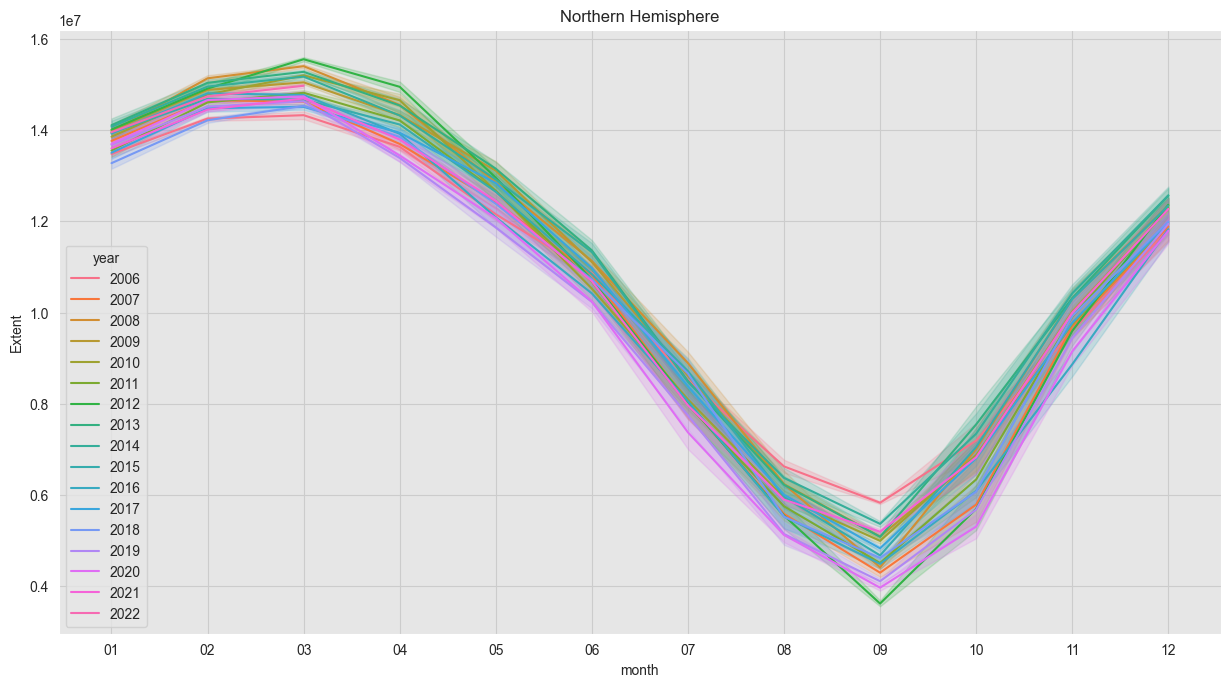

In [21]:
fig, ax = plt.subplots()
sns.lineplot(x='month', y='Northern_Hemisphere', data=df_m.reset_index(), hue='year', ax=ax)
ax.figure.set_figwidth(15)
ax.figure.set_figheight(8)
ax.set(title='Northern Hemisphere', ylabel='Extent');

Text(0.5, 0, 'Extend_Chukchi_Sea')

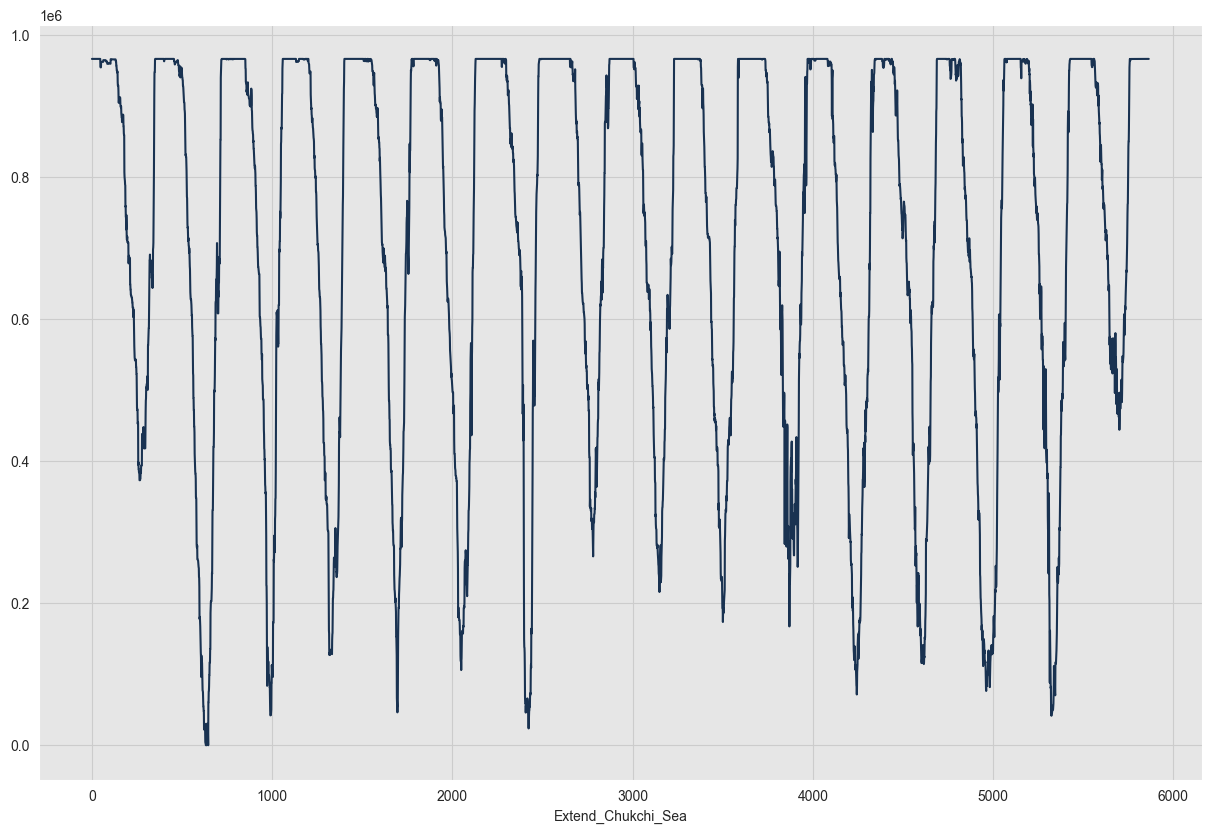

In [22]:
plt.figure(figsize=(15,10))
plt.plot(df_m.index,df_m['Chukchi_Sea'], label=' Chukchi_Sea')
plt.xlabel('Extend_Chukchi_Sea')

Text(0.5, 0, 'Extend_Hudson_Bay')

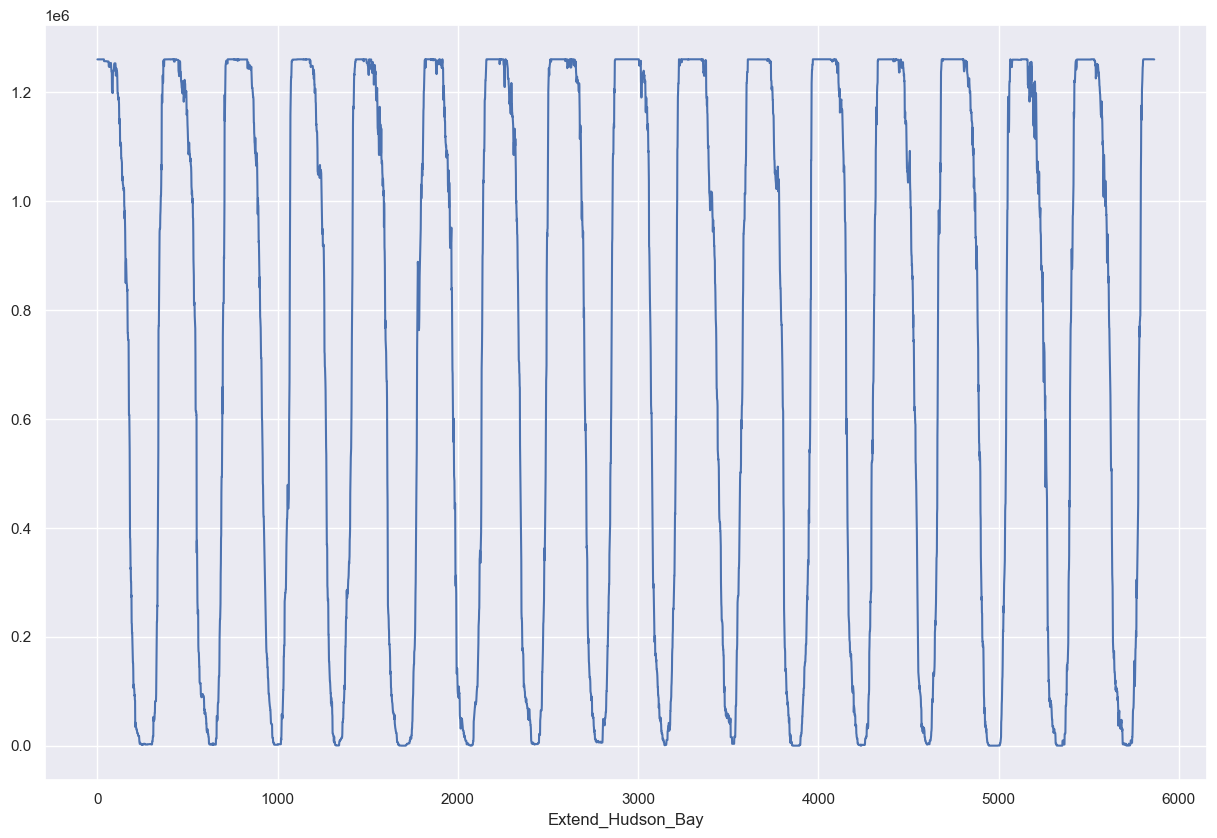

In [41]:
plt.figure(figsize=(15,10))
plt.plot(df_m.index,df_m['Hudson_Bay'], label=' Hudson_Bay')
plt.xlabel('Extend_Hudson_Bay')

In [23]:
#sns.pairplot(df_m)

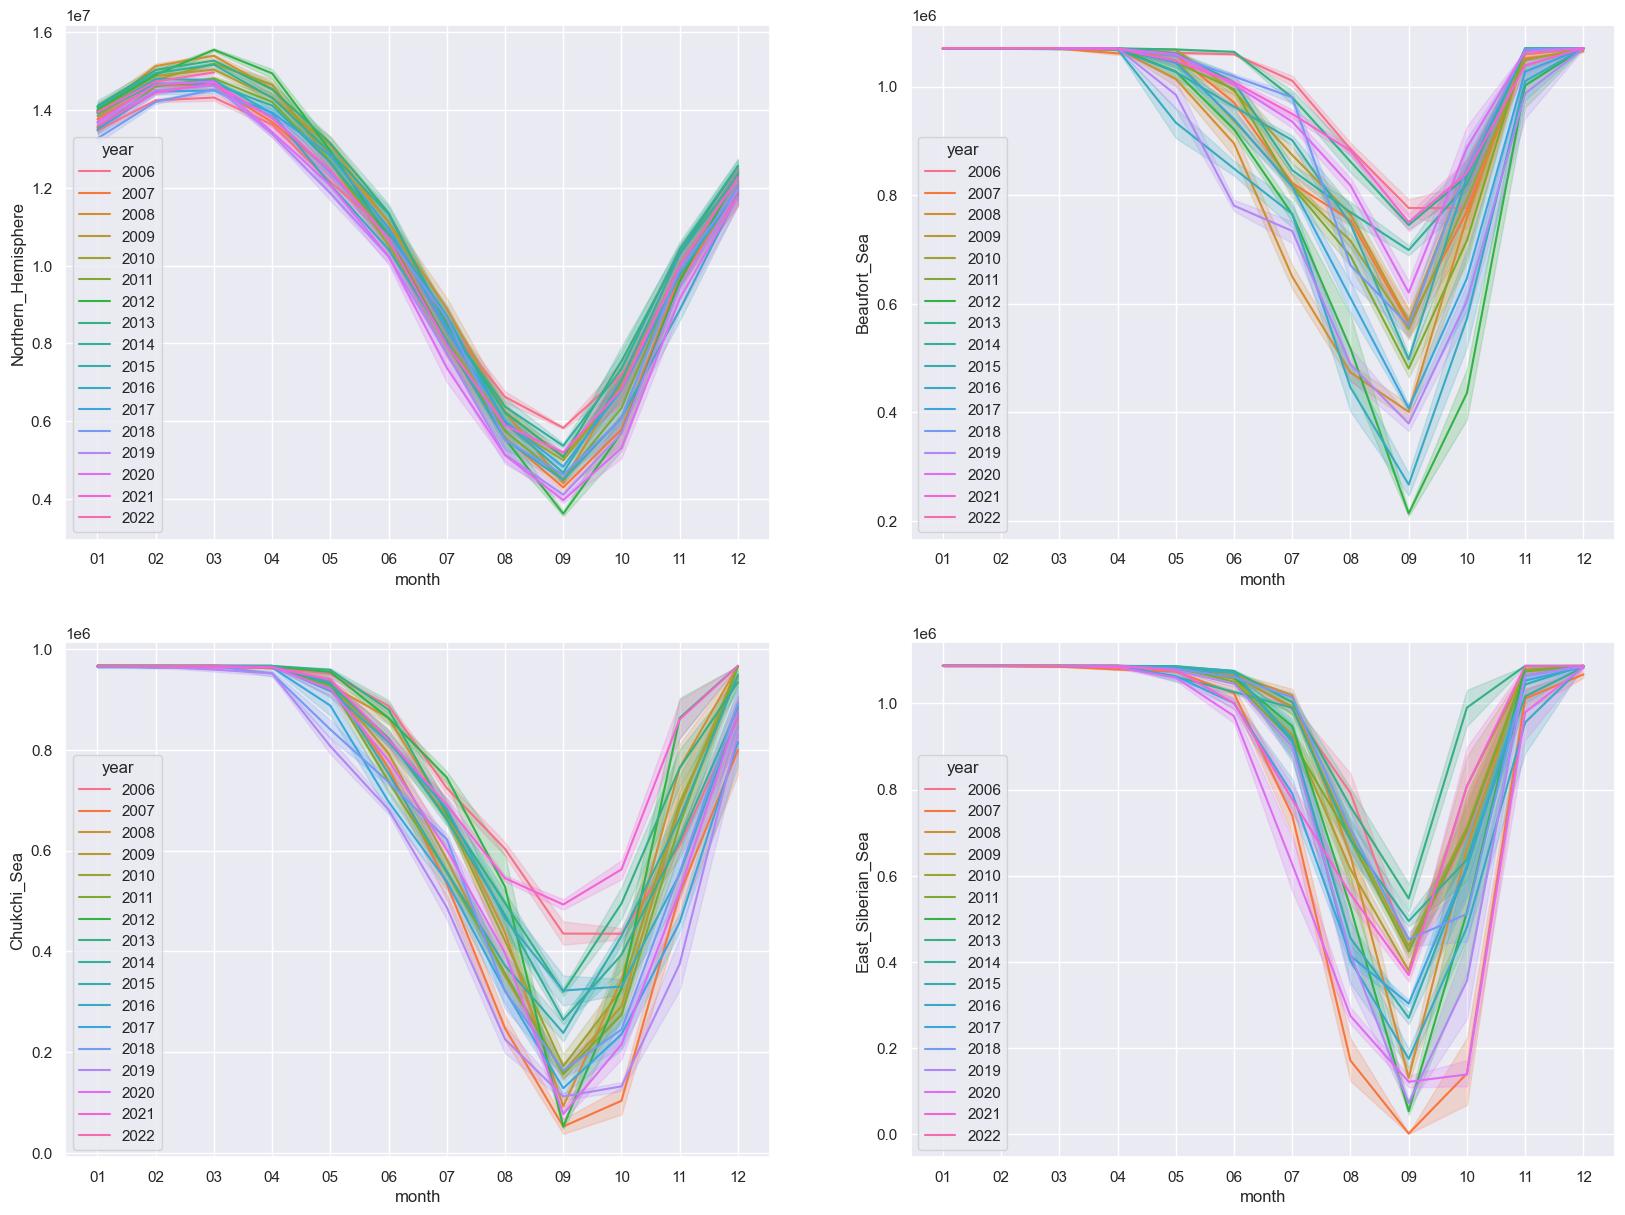

In [24]:
sns.set(style="darkgrid")
#df = sns.load_dataset("df_m")

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sns.lineplot(x='month', y='Northern_Hemisphere', data=df_m.reset_index(), hue='year', ax=axs[0, 0])
ax.set(title='Northern Hemisphere');

sns.lineplot(x='month', y='Beaufort_Sea', data=df_m.reset_index(), hue='year', ax=axs[0, 1])
ax.set(title='Beaufort_Sea');

sns.lineplot(x='month', y='Chukchi_Sea', data=df_m.reset_index(),  hue='year', ax=axs[1, 0])
sns.lineplot(x='month', y='East_Siberian_Sea', data=df_m.reset_index(),  hue='year', ax=axs[1, 1])

plt.show()

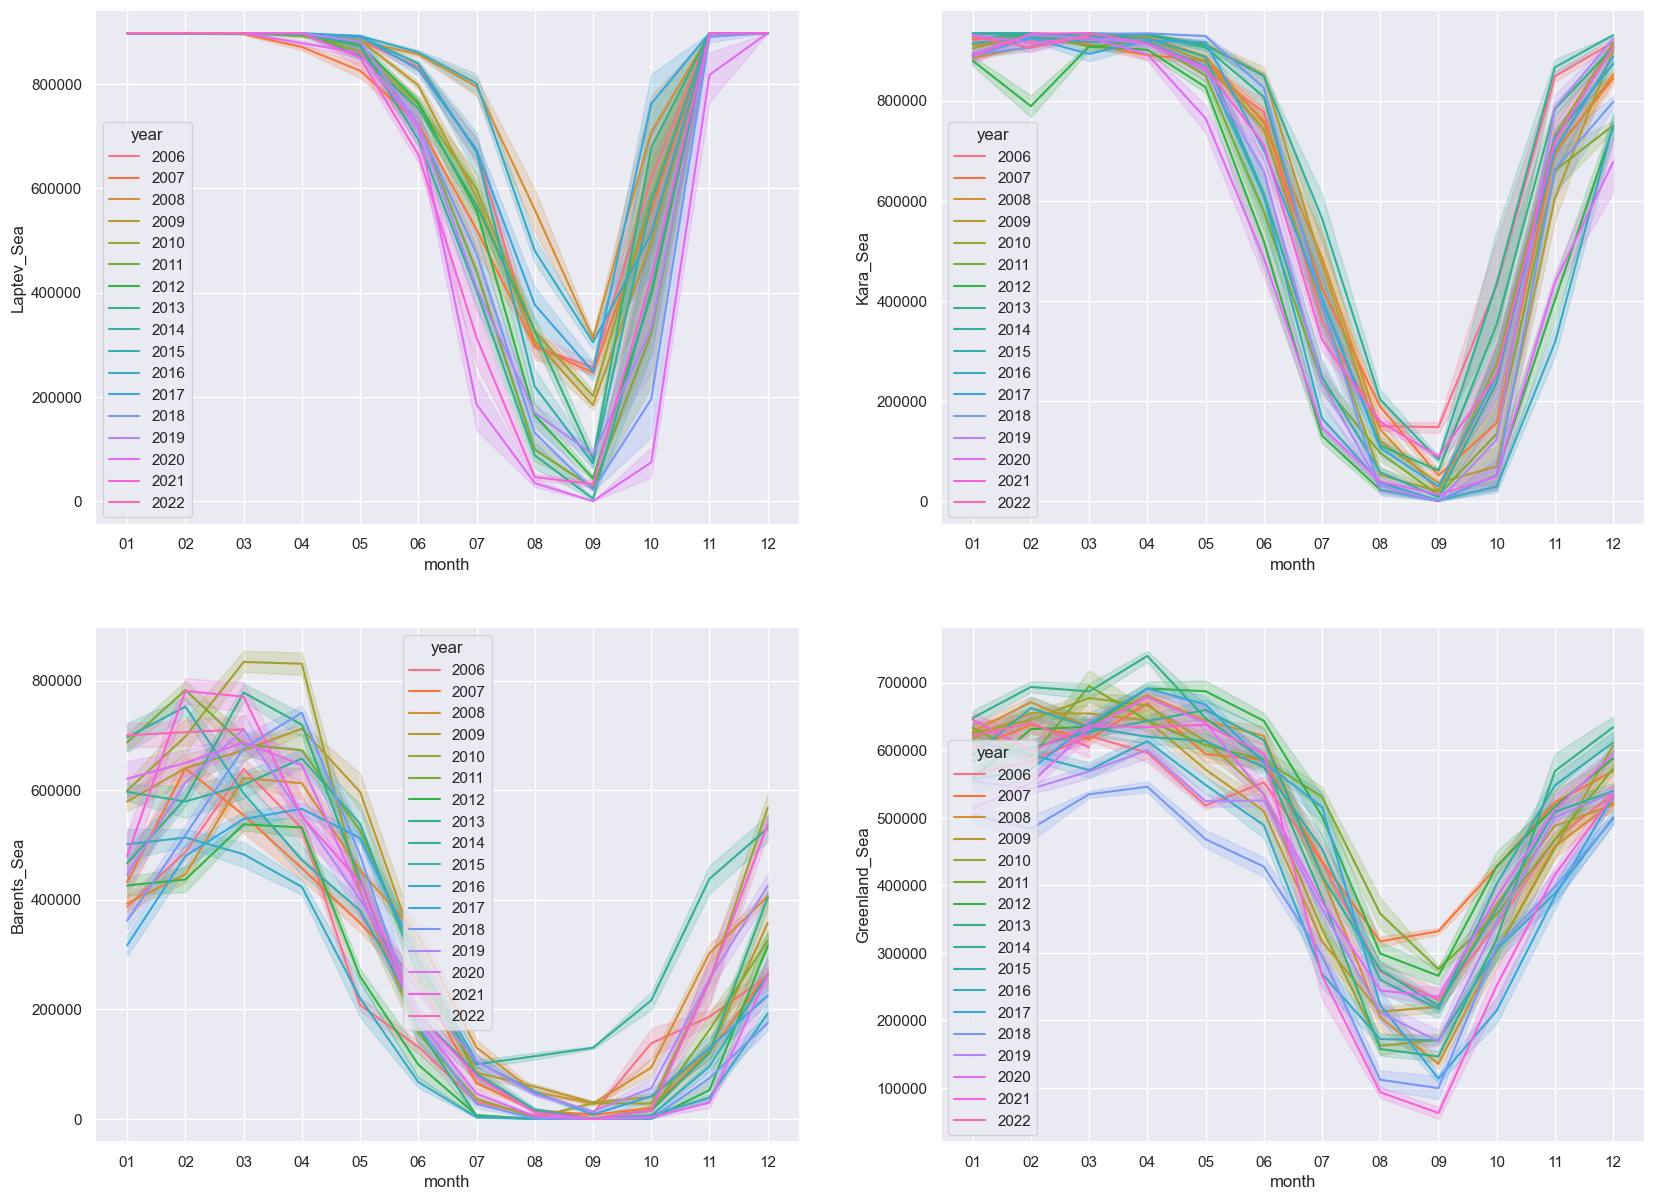

In [25]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sns.lineplot(x='month', y='Laptev_Sea', data=df_m.reset_index(), hue='year', ax=axs[0, 0])
ax.set(title='Laptev_Sea');

sns.lineplot(x='month', y='Kara_Sea', data=df_m.reset_index(), hue='year', ax=axs[0, 1])
ax.set(title='Kara_Sea');

sns.lineplot(x='month', y='Barents_Sea', data=df_m.reset_index(),  hue='year', ax=axs[1, 0])
sns.lineplot(x='month', y='Greenland_Sea', data=df_m.reset_index(),  hue='year', ax=axs[1, 1])

plt.show()

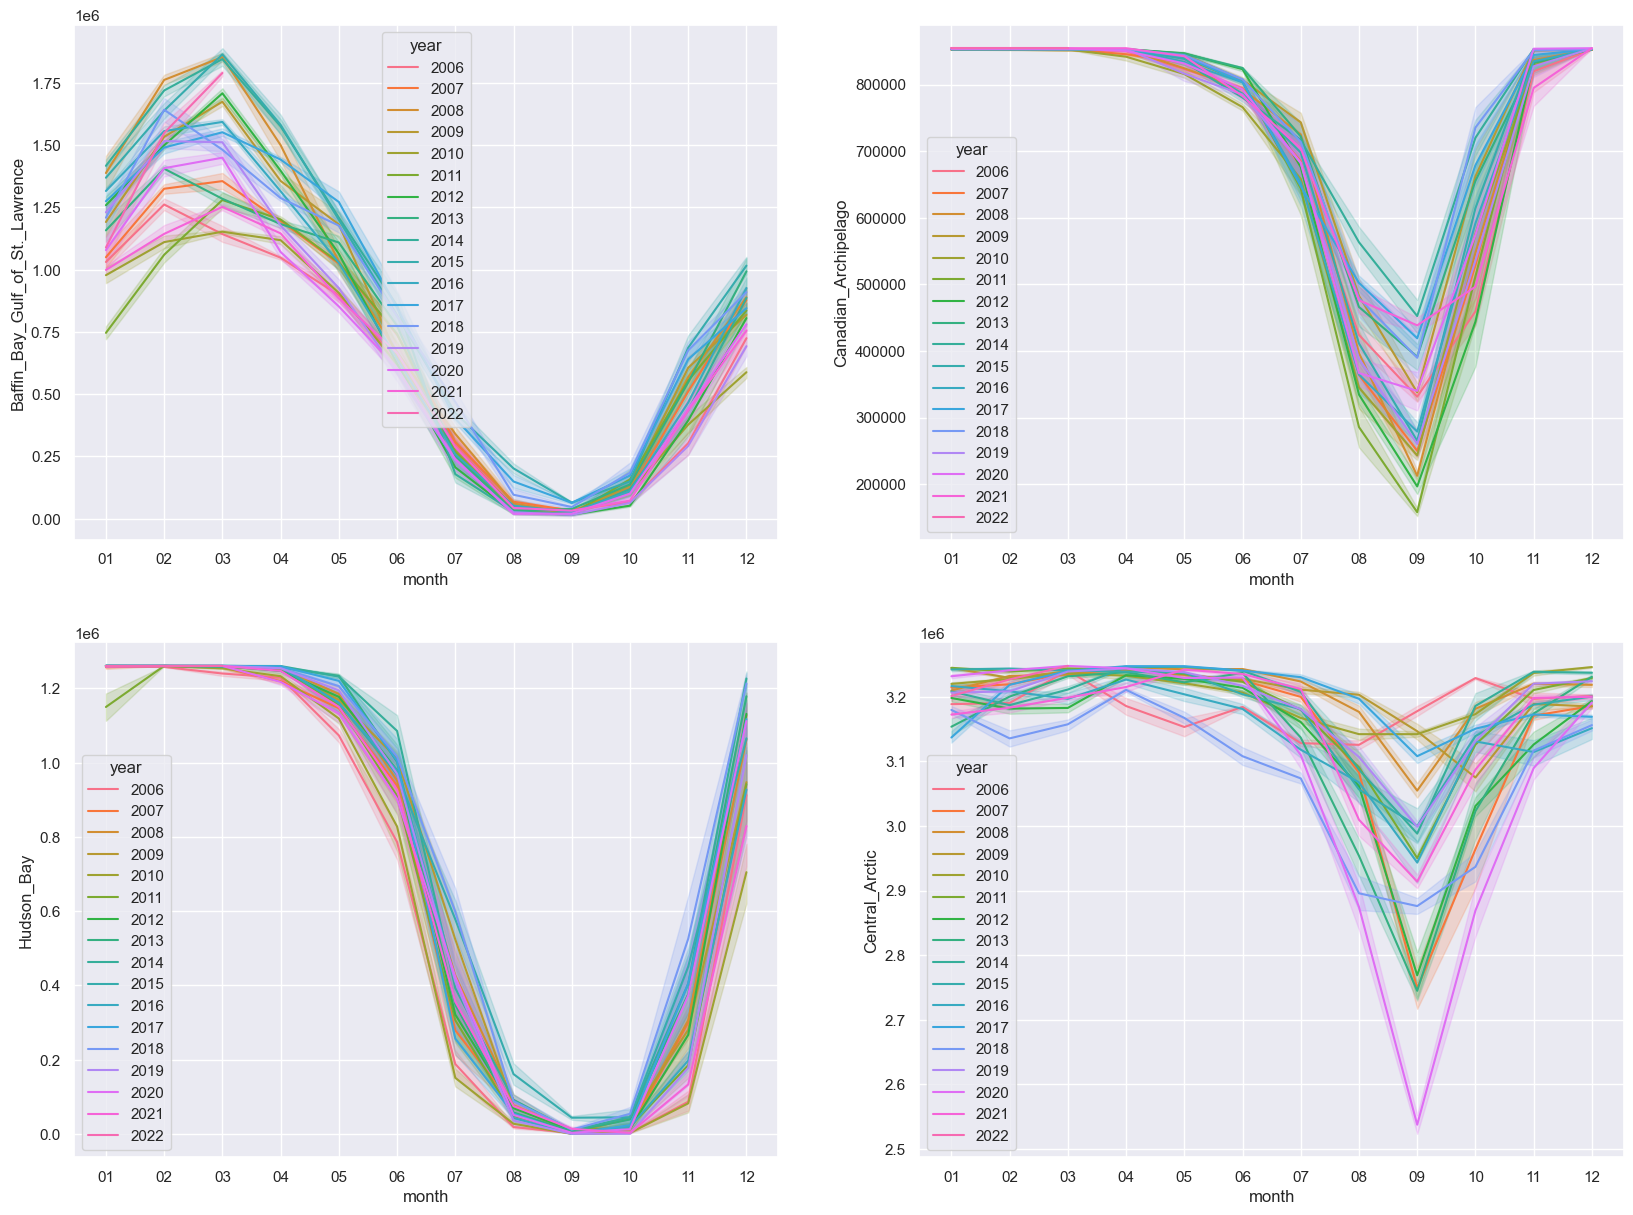

In [26]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sns.lineplot(x='month', y='Baffin_Bay_Gulf_of_St._Lawrence', data=df_m.reset_index(), hue='year', ax=axs[0, 0])
sns.lineplot(x='month', y='Canadian_Archipelago', data=df_m.reset_index(), hue='year', ax=axs[0, 1])
sns.lineplot(x='month', y='Hudson_Bay', data=df_m.reset_index(),  hue='year', ax=axs[1, 0])
sns.lineplot(x='month', y='Central_Arctic', data=df_m.reset_index(),  hue='year', ax=axs[1, 1])

plt.show()

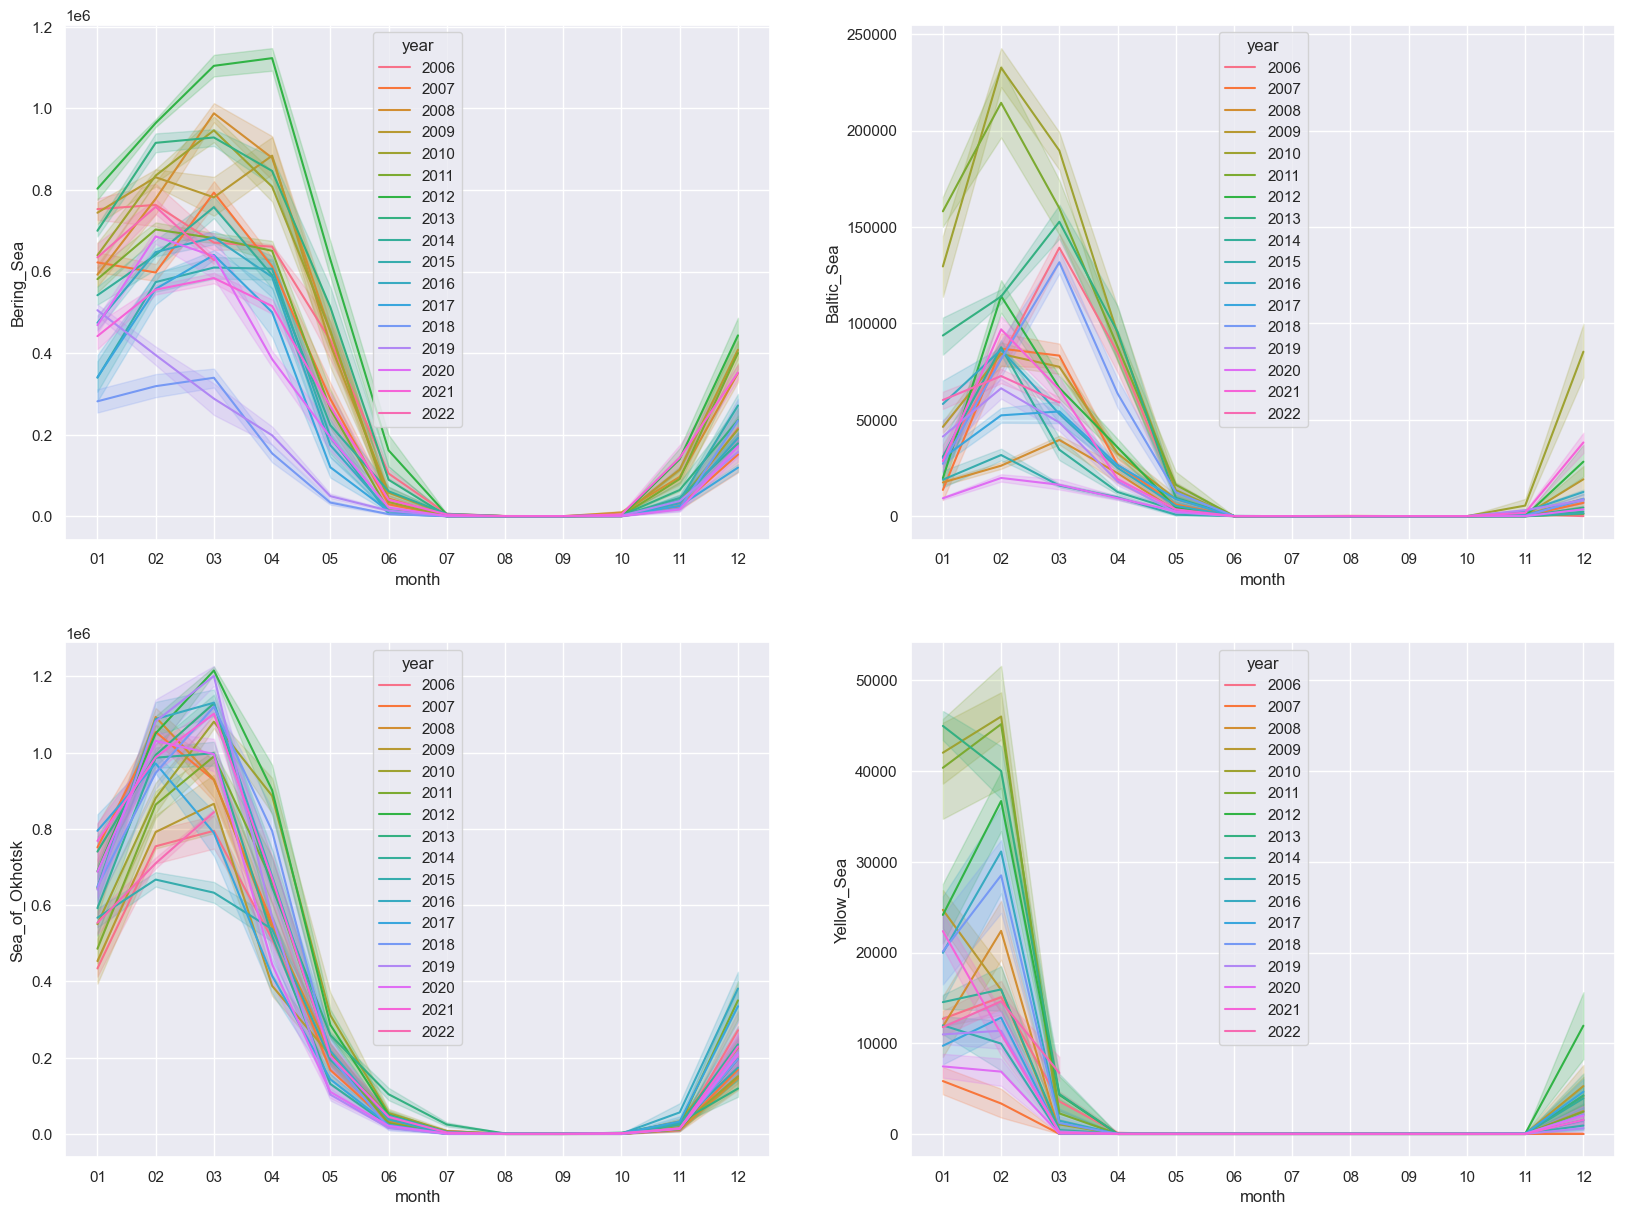

In [27]:
sns.set(style="darkgrid")



fig, axs = plt.subplots(2, 2, figsize=(20, 15))

sns.lineplot(x='month', y='Bering_Sea', data=df_m.reset_index(), hue='year', ax=axs[0, 0])
sns.lineplot(x='month', y='Baltic_Sea', data=df_m.reset_index(), hue='year', ax=axs[0, 1])
sns.lineplot(x='month', y='Sea_of_Okhotsk', data=df_m.reset_index(),  hue='year', ax=axs[1, 0])
sns.lineplot(x='month', y='Yellow_Sea', data=df_m.reset_index(),  hue='year', ax=axs[1, 1])


plt.show()

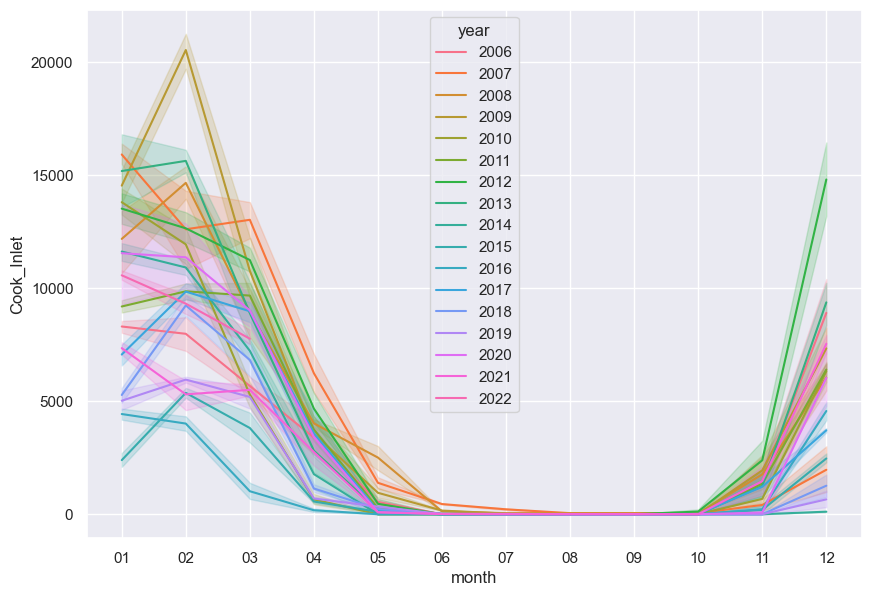

In [28]:
fig, axs = plt.subplots(figsize=(10, 7))
sns.lineplot(x='month', y='Cook_Inlet', data=df_m.reset_index(),  hue='year', ax=axs)
plt.show()

### Visualizing the data for Central Arctic

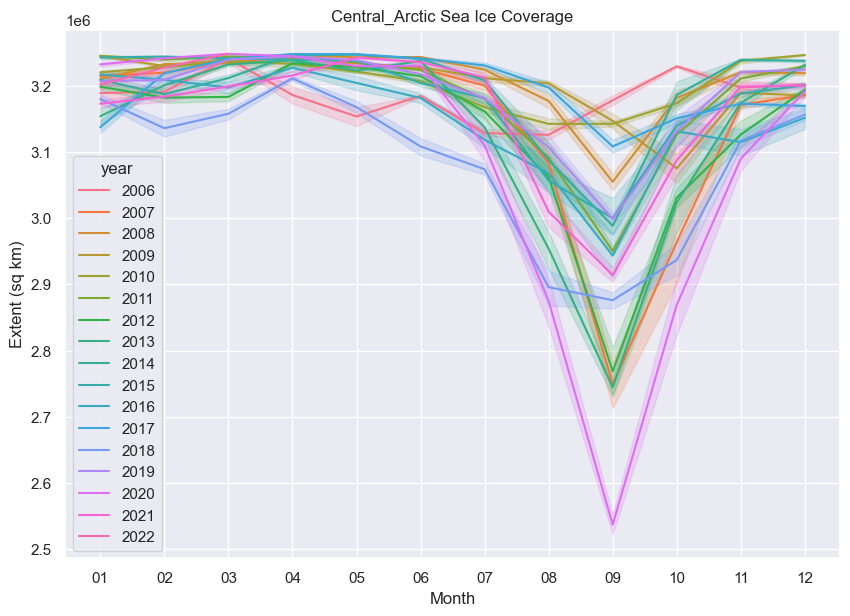

In [44]:
#fig, axs = plt.subplots(figsize=(10, 7))
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(x='month', y='Central_Arctic', data=df_m.reset_index(),  hue='year')
ax.set(title='Central_Arctic Sea Ice Coverage', xlabel='Month', ylabel='Extent (sq km)')
#plt.yticks([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5]);

fig.savefig('images/Central_Arctic_1_month.png', dpi=300)

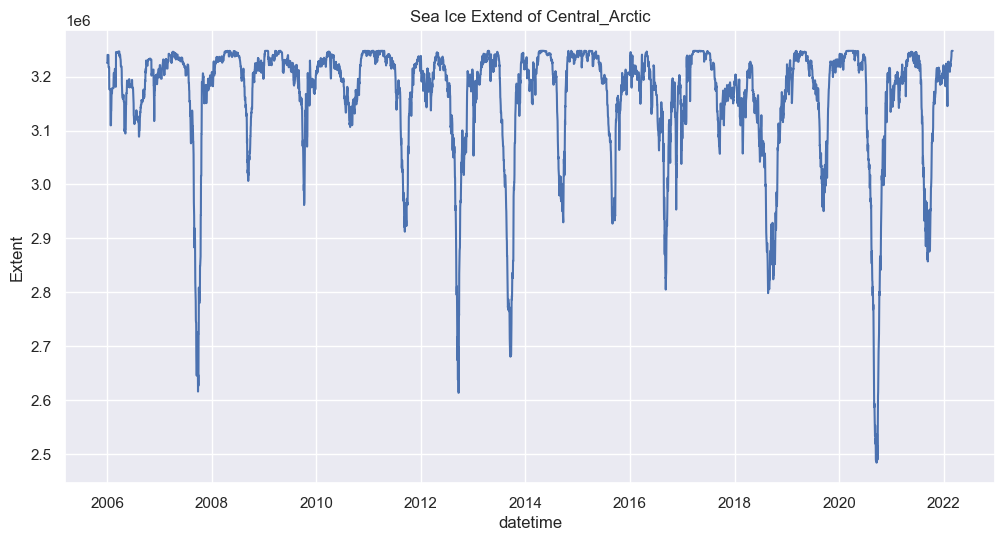

In [30]:

fig, ax = plt.subplots()
sns.lineplot(x='datetime', y='Central_Arctic', data=df_m, ax=ax)
ax.set(title='Sea Ice Extend of Central_Arctic', ylabel='Extent');

In [31]:
df_m.columns

Index(['Northern_Hemisphere', 'Beaufort_Sea', 'Chukchi_Sea',
       'East_Siberian_Sea', 'Laptev_Sea', 'Kara_Sea', 'Barents_Sea',
       'Greenland_Sea', 'Baffin_Bay_Gulf_of_St._Lawrence',
       'Canadian_Archipelago', 'Hudson_Bay', 'Central_Arctic', 'Bering_Sea',
       'Baltic_Sea', 'Sea_of_Okhotsk', 'Yellow_Sea', 'Cook_Inlet', 'date',
       'day', 'month', 'year', 'datetime'],
      dtype='object')

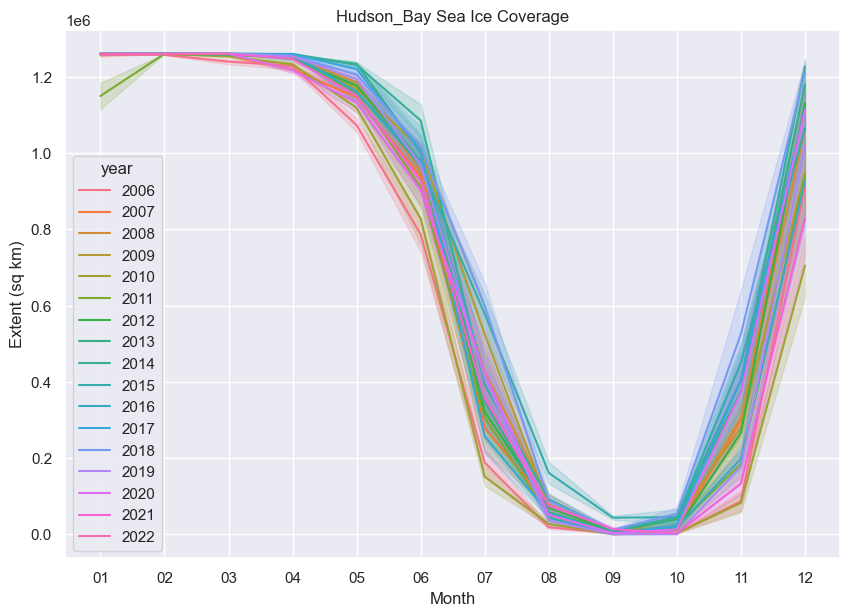

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(x='month', y='Hudson_Bay', data=df_m.reset_index(),  hue='year', ax=ax)
ax.set(title='Hudson_Bay Sea Ice Coverage', xlabel='Month', ylabel='Extent (sq km)');

fig.savefig('images/Hudson_Bay_1_month.png', dpi=300)

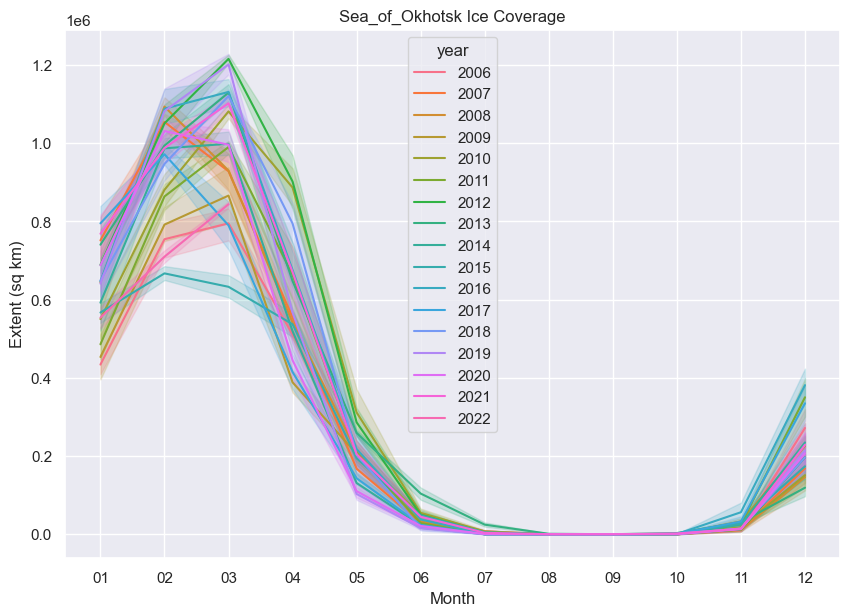

In [33]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(x='month', y='Sea_of_Okhotsk', data=df_m.reset_index(),  hue='year', ax=ax)
ax.set(title='Sea_of_Okhotsk Ice Coverage', xlabel='Month', ylabel='Extent (sq km)');

fig.savefig('images/Sea_of_Okhotsk_1_month.png', dpi=300)

In [34]:
df_m.columns

Index(['Northern_Hemisphere', 'Beaufort_Sea', 'Chukchi_Sea',
       'East_Siberian_Sea', 'Laptev_Sea', 'Kara_Sea', 'Barents_Sea',
       'Greenland_Sea', 'Baffin_Bay_Gulf_of_St._Lawrence',
       'Canadian_Archipelago', 'Hudson_Bay', 'Central_Arctic', 'Bering_Sea',
       'Baltic_Sea', 'Sea_of_Okhotsk', 'Yellow_Sea', 'Cook_Inlet', 'date',
       'day', 'month', 'year', 'datetime'],
      dtype='object')

In [36]:
df_CA= df_m[['date','Central_Arctic']]
df_CA.to_csv('data/Central_Arctic_from_masie.csv', encoding='utf-8', index=False)

In [38]:
df_SO= df_m[['date','Sea_of_Okhotsk']]
df_SO.to_csv('data/Sea_of_Okhotsk_from_masie.csv', encoding='utf-8', index=False)

In [39]:
df_HB= df_m[['date','Hudson_Bay']]
df_HB.to_csv('data/Hudson_Bay_from_masie.csv', encoding='utf-8', index=False)